<a href="https://colab.research.google.com/github/haekalrizky/Beans/blob/master/Beans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base Model

## Import library

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load data

In [0]:
train_url = "https://storage.googleapis.com/ibeans/train.zip"
val_url = "https://storage.googleapis.com/ibeans/validation.zip"
test_url = "https://storage.googleapis.com/ibeans/test.zip"

train_path_to_zip = tf.keras.utils.get_file('train.zip', origin=train_url, extract=True)
val_path_to_zip = tf.keras.utils.get_file('validation.zip', origin=val_url, extract=True)
test_path_to_zip = tf.keras.utils.get_file('test.zip', origin=train_url, extract=True)

train_path = os.path.join(os.path.dirname(train_path_to_zip), 'train')
val_path = os.path.join(os.path.dirname(val_path_to_zip), 'validation')
test_path = os.path.join(os.path.dirname(test_path_to_zip), 'test')

143818752/143812152 [==============================] - 1s 0us/step


In [0]:
train_als_dir = os.path.join(train_path, 'angular_leaf_spot') 
train_br_dir = os.path.join(train_path, 'bean_rust') 
train_healthy_dir = os.path.join(train_path, 'healthy')

val_als_dir = os.path.join(val_path, 'angular_leaf_spot') 
val_br_dir = os.path.join(val_path, 'bean_rust') 
val_healthy_dir = os.path.join(val_path, 'healthy') 

test_als_dir = os.path.join(test_path, 'angular_leaf_spot') 
test_br_dir = os.path.join(test_path, 'bean_rust') 
test_healthy_dir = os.path.join(test_path, 'healthy') 

## Check Data

In [0]:
print('Total angular_leaf_spot training images:', len(os.listdir(train_als_dir)))
print('Total bean_rust training images:', len(os.listdir(train_br_dir)))
print('Total healthy training images:', len(os.listdir(train_healthy_dir)), '\n')

print('Total angular_leaf_spot validation images:', len(os.listdir(val_als_dir)))
print('Total bean_rust validation images:', len(os.listdir(val_br_dir)))
print('Total healthy validation images:', len(os.listdir(val_healthy_dir)))

Total angular_leaf_spot training images: 345
Total bean_rust training images: 348
Total healthy training images: 342 

Total angular_leaf_spot validation images: 44
Total bean_rust validation images: 45
Total healthy validation images: 44


In [0]:
total_train = len(os.listdir(train_als_dir)) +  len(os.listdir(train_br_dir)) + len(os.listdir(train_healthy_dir))
total_val = len(os.listdir(val_als_dir)) + len(os.listdir(val_br_dir)) + len(os.listdir(val_healthy_dir))

In [0]:
batch_size = 32
epochs = 15
img_height = 500
img_width = 500

## Prepare data

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_path,
                                                           shuffle=True,
                                                           target_size=(img_height, img_width),
                                                           class_mode='sparse')

Found 1034 images belonging to 3 classes.


In [0]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=val_path,
                                                              target_size=(img_height, img_width),
                                                              class_mode='sparse')

Found 133 images belonging to 3 classes.


## Visualize training data

In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

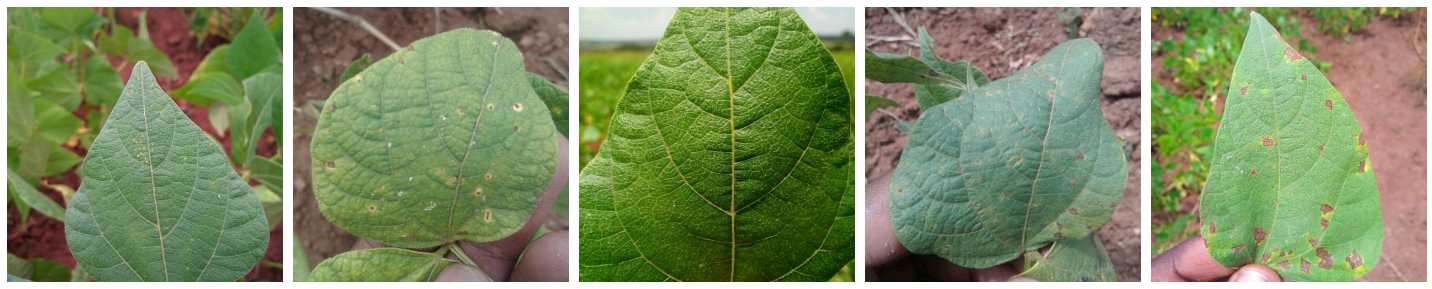

In [0]:
plotImages(sample_training_images[:5])

## Create Model

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width ,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers. MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

## Compile model

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 500, 500, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 250, 250, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 250, 250, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0

## Train model

In [0]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
32/32 [==============================] - 14s 429ms/step - loss: 4.9300 - accuracy: 0.5120 - val_loss: 0.7067 - val_accuracy: 0.6562
Epoch 2/15
32/32 [==============================] - 13s 409ms/step - loss: 0.7007 - accuracy: 0.7056 - val_loss: 0.6861 - val_accuracy: 0.6797
Epoch 3/15
32/32 [==============================] - 13s 410ms/step - loss: 0.5812 - accuracy: 0.7575 - val_loss: 0.6049 - val_accuracy: 0.7188
Epoch 4/15
32/32 [==============================] - 13s 413ms/step - loss: 0.4866 - accuracy: 0.8124 - val_loss: 0.5698 - val_accuracy: 0.7734
Epoch 5/15
32/32 [==============================] - 13s 409ms/step - loss: 0.4015 - accuracy: 0.8573 - val_loss: 0.7015 - val_accuracy: 0.7344
Epoch 6/15
32/32 [==============================] - 13s 412ms/step - loss: 0.2796 - accuracy: 0.9022 - val_loss: 0.8018 - val_accuracy: 0.7031
Epoch 7/15
32/32 [==============================] - 13s 410ms/step - loss: 0.2228 - accuracy: 0.9112 - val_loss: 0.7129 - val_accuracy: 0.7188

## Visualize training and validation results

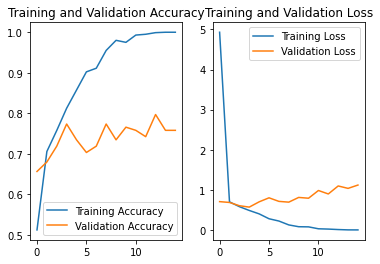

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
tf.keras.backend.clear_session()

# Improved model

## Apply data augmentation

In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [0]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_path,
                                                     shuffle=True,
                                                     target_size=(img_height, img_width),
                                                     class_mode='sparse')

Found 1034 images belonging to 3 classes.


## Visualize augmented data

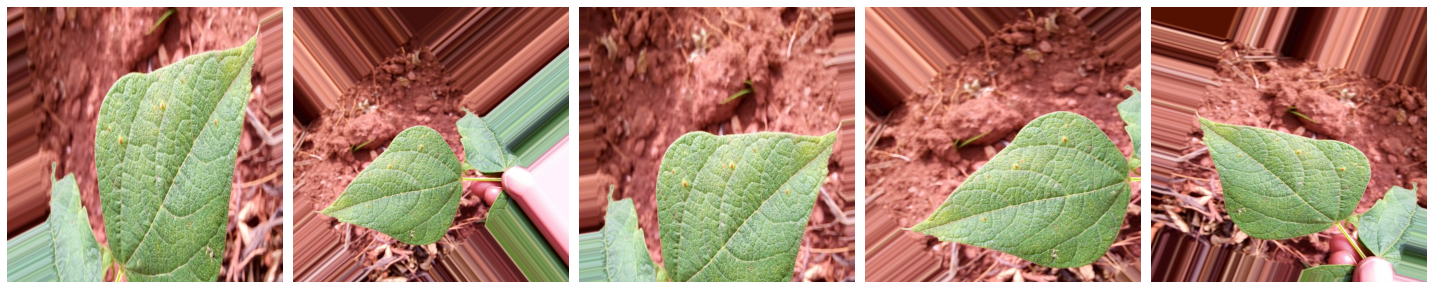

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [0]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_path,
                                                 target_size=(img_height, img_width),
                                                 class_mode='sparse')

Found 133 images belonging to 3 classes.


## Create new model with dropout layer(s)

In [0]:
new_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width ,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

## Compile new model

In [0]:
new_model.compile(optimizer='adam',
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])

In [0]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 500, 500, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 250, 250, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 250, 250, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 250, 250, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0

## Train new model

In [0]:
history = new_model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
32/32 [==============================] - 63s 2s/step - loss: 4.3996 - accuracy: 0.4192 - val_loss: 0.8920 - val_accuracy: 0.5391
Epoch 2/15
32/32 [==============================] - 62s 2s/step - loss: 0.9515 - accuracy: 0.5389 - val_loss: 0.7326 - val_accuracy: 0.6797
Epoch 3/15
32/32 [==============================] - 62s 2s/step - loss: 0.8532 - accuracy: 0.6058 - val_loss: 0.7037 - val_accuracy: 0.7031
Epoch 4/15
32/32 [==============================] - 62s 2s/step - loss: 0.9013 - accuracy: 0.5948 - val_loss: 0.6666 - val_accuracy: 0.7266
Epoch 5/15
32/32 [==============================] - 62s 2s/step - loss: 0.8769 - accuracy: 0.5928 - val_loss: 0.7816 - val_accuracy: 0.6484
Epoch 6/15
32/32 [==============================] - 62s 2s/step - loss: 0.7781 - accuracy: 0.6497 - val_loss: 0.8161 - val_accuracy: 0.6094
Epoch 7/15
32/32 [==============================] - 62s 2s/step - loss: 0.7382 - accuracy: 0.6796 - val_loss: 0.7405 - val_accuracy: 0.6328
Epoch 8/15
32/32 [==

## Visualize training and validation results

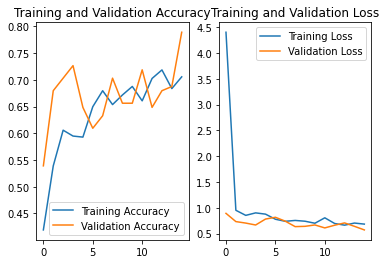

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()